# OpenCV Library Options

OpenCV is a computer vision and machine learning library with an open source code. This library has interfaces in many languages: Java, C++, Matlab and Python, of course. 

<a href='https://readthedocs.org/projects/opencv-python-tutroals/downloads/pdf/latest/' target='_blank'>Here</a> you can find the official tutorials and documentation.

## OpenCV installation

In [1]:
!pip install opencv-python==4.4.0.42

You should consider upgrading via the '/Users/romanov/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


After the successive installation, reload the kernel to check that your version is 4.4.0

In [2]:
import cv2
print('OpenCV version:', cv2.__version__)

OpenCV version: 4.4.0


## Color model, channels

To display the images in the notebook, we are going to use matplotlib library:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's make a directory img and place the image in it

In [4]:
path = 'img/'
file_name = 'alisa-olaivar-5bjgzAPKzpI-unsplash.jpg'

Read the image using cv2.imread() command

In [5]:
img = cv2.imread(path + file_name)

img object is an array of the ndarray type, allowing to perform various operations with it and, correspondingly, the image. Let's consider its structure

In [6]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(3372, 5097, 3)


Thus, the array dimensionality is (3372, 5097, 3). The first two values correspond to the image resolution. The first value (3372) is the image height in pixels (or row number in the array), and the second value (5097) is the width (or column number). The third value indicates the information saved about each pixel. In this case (for a color RGB image) it shows the intensity of corresponding channels.

Let's display the image saved as array. We will use imshow() command to do that:

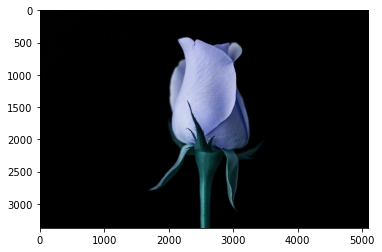

In [7]:
plt.imshow(img)
plt.show()

If we compare the original image and the image displayed above, you can notice some mismatch in colors.

<b>Note!</b> Let's note two importany moments. Firstly, the image is displayed in reverse color model, that is BGR and not an usual RGB. To display the channels R and B correctly, they should be exchanged. Secondly, image resolution is calculated starting from the left upper corner (you can notice the corresponding coordinates system).

You can change R and B manually, but it is more convenient to use the following built-in function:

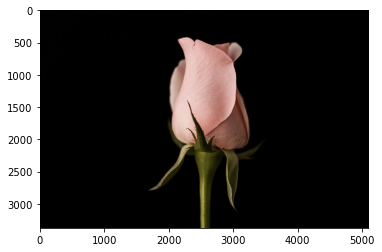

In [8]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

Most commands return a tuple, so we recommend to use the following syntax:

In [9]:
h, w, c = img.shape
print('Width:  ', w)
print('Height: ', h)
print('Channels:', c)

Width:   5097
Height:  3372
Channels: 3


In [10]:
B, G, R = img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


Do not forget what is the color model of the image, as it influences the value order!

In [11]:
R, G, B = RGB_img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


Referring to some pixel channels, we can change its intensities. For example, the can set R and G equal to zero:

In [12]:
import numpy as np

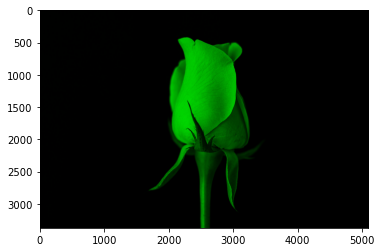

In [13]:
green_img = RGB_img.copy()

green_img[:, :, 0] = 0 
green_img[:, :, 2] = 0

plt.imshow(green_img)
plt.show()

Or set the intensity of R channel equal to 250 for all pixels:

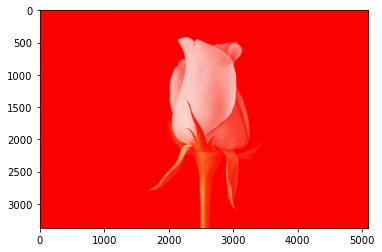

In [14]:
red_intense_img = RGB_img.copy()

red_intense_img[:, :, 0] = 250

plt.imshow(red_intense_img)
plt.show()

## Image transformation (cropping, compression, rotation)

As the image is an array, to crop the image we need simply to refer to the desired range of pixels.

The following code selects the image pixel range from 300 to 3200 in veritical direction (recall that 0 is above and the numbering starts from 0) and the range from 1500 to 3500 in horizontal direction:

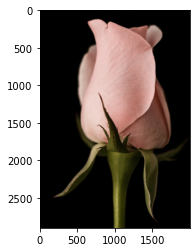

In [15]:
crop_img = RGB_img[300:3200, 1500:3500]
plt.imshow(crop_img)
plt.show()

To scale or compress the image the function resize() is to be used, with the original image and the new size in pixels as parameters. Besides, you can specify the image transformation. To get more information on algorithms and underlying mathematics please turn to <a href='https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html' target='_blank'>the documentation</a>.

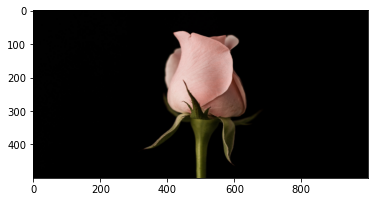

In [16]:
dim = (1000, 500)
resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

The image is resized to 1000 pixels in width and 500 pixels in height, which of course leads to the incorrect proportion. To maintain the proportions, the ratio of the original sides should be found:

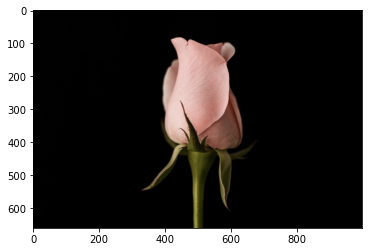

In [17]:
h, w, c = RGB_img.shape
new_width = 1000

k = float(w) / h
dim = (new_width, int(new_width / k))

resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

And finally, the last basic transformation is the image rotation. To do this, we need to create a matrix of rotation by a given angle. Positive values ​​correspond to counter-clockwise rotation, negative values ​​correspond to clockwise rotation. The rotation, of course, is specified with regards to some point.

Let's rotate the image by 45 degrees clockwise with regard to (almost) center. getRotationMatrix2D() function creates the rotation matrix, and warpAffine() transforms the image.

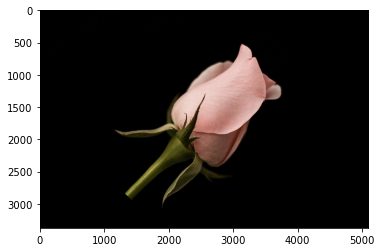

In [18]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2) 
M = cv2.getRotationMatrix2D(center, -45, 1)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

We can scale the image during the rotation using the last parameters of getRotationMatrix2D() function.

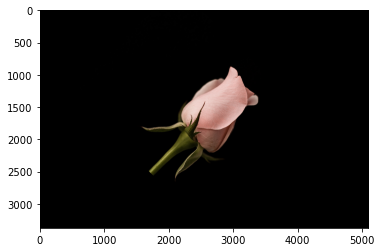

In [19]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2) 
M = cv2.getRotationMatrix2D(center, -45, 0.7)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

## More about color models

We have already discussed color models and learned to transform a BGR image to an RGB one. A useful color model for computer vision models implementation is the gray scale (grayscale). Such a scale conveys 256 shades of gray, or intensity (a 0 value corresponds to black, and a 255 corresponds to white).

To transform a BGR image let's use COLOR_BGR2GRAY method:

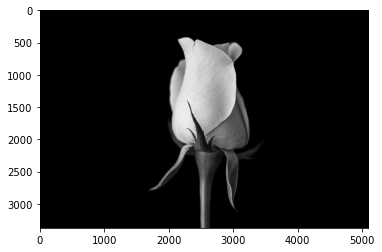

In [20]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

Looking a little ahead, this color model is useful in the task of objects boundaries detecting. For example, using the threshold function, we can change the intensity of pixels that are darker (less than the threshohold) or, accordingly, brighter (greater) than a certain threshold.

For example, let's set all pixels darker than 127 to zero, and all pixels that are brighter than 127 to 255.

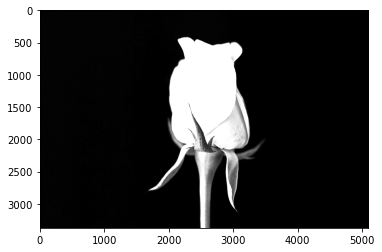

In [21]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, 10)
plt.imshow(thresh_image, cmap='gray')
plt.show()

As a result, the flower has a very well-defined border with the background, and can later be detected in the image.

Here are more examples:

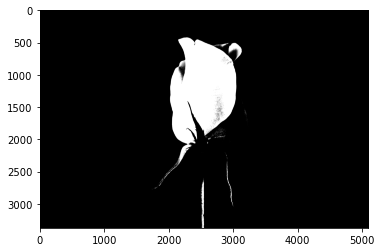

In [22]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_image, cmap='gray')
plt.show()

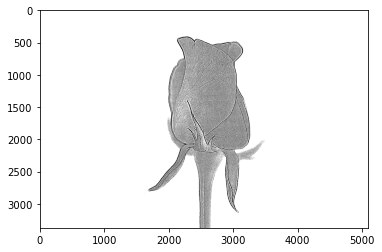

In [23]:
th2 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th2, cmap='gray')
plt.show()

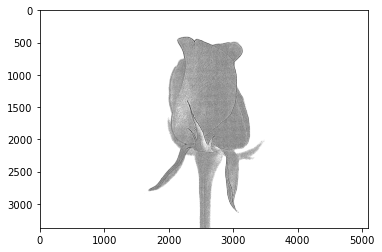

In [24]:
th3 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th3, cmap='gray')
plt.show()

## Saving the image

You can of course save all obtained images by using imwrite() command. As the parameters of this command we specify the path with the file name and the variable in which the image is stored.

In [25]:
path = ''
file_name = 'gray_image.jpg'

cv2.imwrite(path + file_name, gray_image)

True

Please note that when saving a color image, imwrite() function saves in BGR format.

In [26]:
path = ''
file_name = 'temp.jpg'

cv2.imwrite(path + file_name, cv2.cvtColor(RGB_img, cv2.COLOR_RGB2BGR))

True